<a href="https://colab.research.google.com/github/bharaniakella/100xdl/blob/main/learning_rates_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import numpy as np

In [84]:
A=[1,1]
B=[5,1]
n_clust=100
blur=1
a=[A[0]+np.random.randn(100)*blur,A[1]+np.random.randn(100)*blur]
b=[B[0]+np.random.randn(100)*blur,B[1]+np.random.randn(100)*blur]

In [85]:
data=np.hstack((a,b))
data_np=data.T
labels_np=np.vstack((np.zeros((n_clust,1)),np.ones((n_clust,1))))

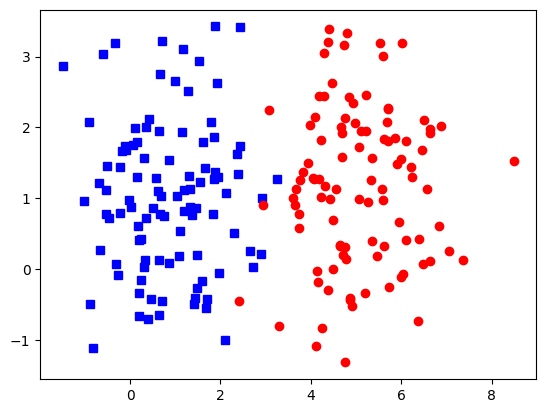

In [86]:
plt.plot(data_np[:100,0],data_np[:100,1],'bs')
plt.plot(data_np[100:,0],data_np[100:,1],'ro')
plt.show()

In [87]:
data=torch.tensor(data_np).float()
labels=torch.tensor(labels_np).float()

In [88]:
def create_model(lr):
  ann_lr=nn.Sequential(
      nn.Linear(2,1),
      nn.ReLU(),
      nn.Linear(1,1)
  )

  loss_fun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(ann_lr.parameters(),lr=lr)
  return ann_lr, loss_fun, optimizer

In [89]:
num_epochs=500
def train_model(ann_lr):
  losses=torch.zeros(num_epochs)
  for epochi in range(num_epochs):
    yhat=ann_lr(data)
    loss=loss_fun(yhat,labels)
    losses[epochi]=loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions = ann_lr(data)
  total_acc = 100*torch.mean(((predictions>0)==labels).float())

  return losses, predictions, total_acc

In [90]:
ann_lr, loss_fun, optimizer=create_model(0.05)

In [91]:
losses, predictions, total_acc=train_model(ann_lr)

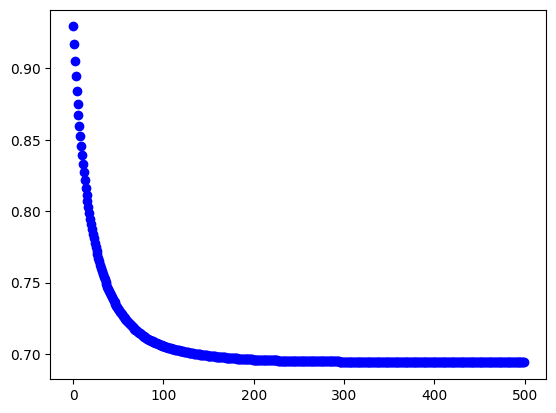

In [92]:
plt.plot(losses.detach(),'bo')
plt.show()

In [93]:
learning_Rates=np.linspace(0.001,0.1,20)
learning_Rates

array([0.001     , 0.00621053, 0.01142105, 0.01663158, 0.02184211,
       0.02705263, 0.03226316, 0.03747368, 0.04268421, 0.04789474,
       0.05310526, 0.05831579, 0.06352632, 0.06873684, 0.07394737,
       0.07915789, 0.08436842, 0.08957895, 0.09478947, 0.1       ])

In [94]:
accByLr=[]
results=torch.zeros((len(learning_Rates),num_epochs))

In [95]:
for i,lr in enumerate(learning_Rates):
  ann_lr, loss_fun, optimizer=create_model(lr)
  losses, predictions, total_acc=train_model(ann_lr)

  accByLr.append(100*torch.mean(((predictions>0)==labels).float()))
  results[i,:]=losses

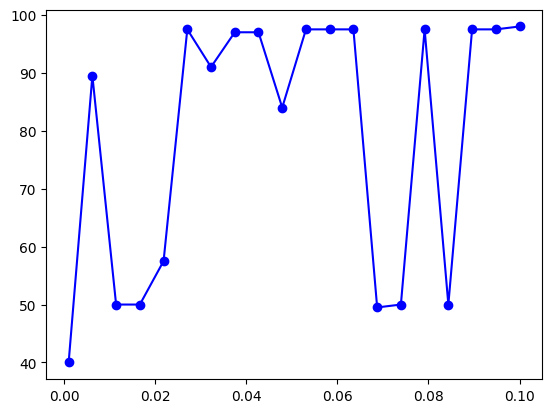

In [96]:
plt.plot(learning_Rates,accByLr,'bo-')
plt.show()

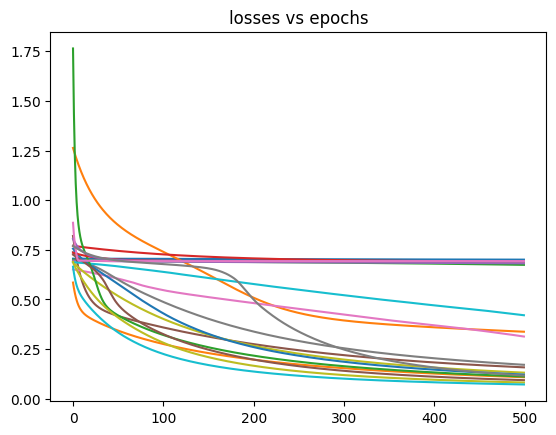

In [103]:
plt.plot(results.detach().T,'-')
plt.title('losses vs epochs')
plt.show()